76. Minimum Window Substring
Given two strings s and t of lengths m and n respectively, return the minimum window 
substring
 of s such that every character in t (including duplicates) is included in the window. If there is no such substring, return the empty string "".

The testcases will be generated such that the answer is unique.

 

Example 1:

Input: s = "ADOBECODEBANC", t = "ABC"
Output: "BANC"
Explanation: The minimum window substring "BANC" includes 'A', 'B', and 'C' from string t.
Example 2:

Input: s = "a", t = "a"
Output: "a"
Explanation: The entire string s is the minimum window.
Example 3:

Input: s = "a", t = "aa"
Output: ""
Explanation: Both 'a's from t must be included in the window.
Since the largest window of s only has one 'a', return empty string.
 

Constraints:

m == s.length
n == t.length
1 <= m, n <= 105
s and t consist of uppercase and lowercase English letters.
 

Follow up: Could you find an algorithm that runs in O(m + n) time?


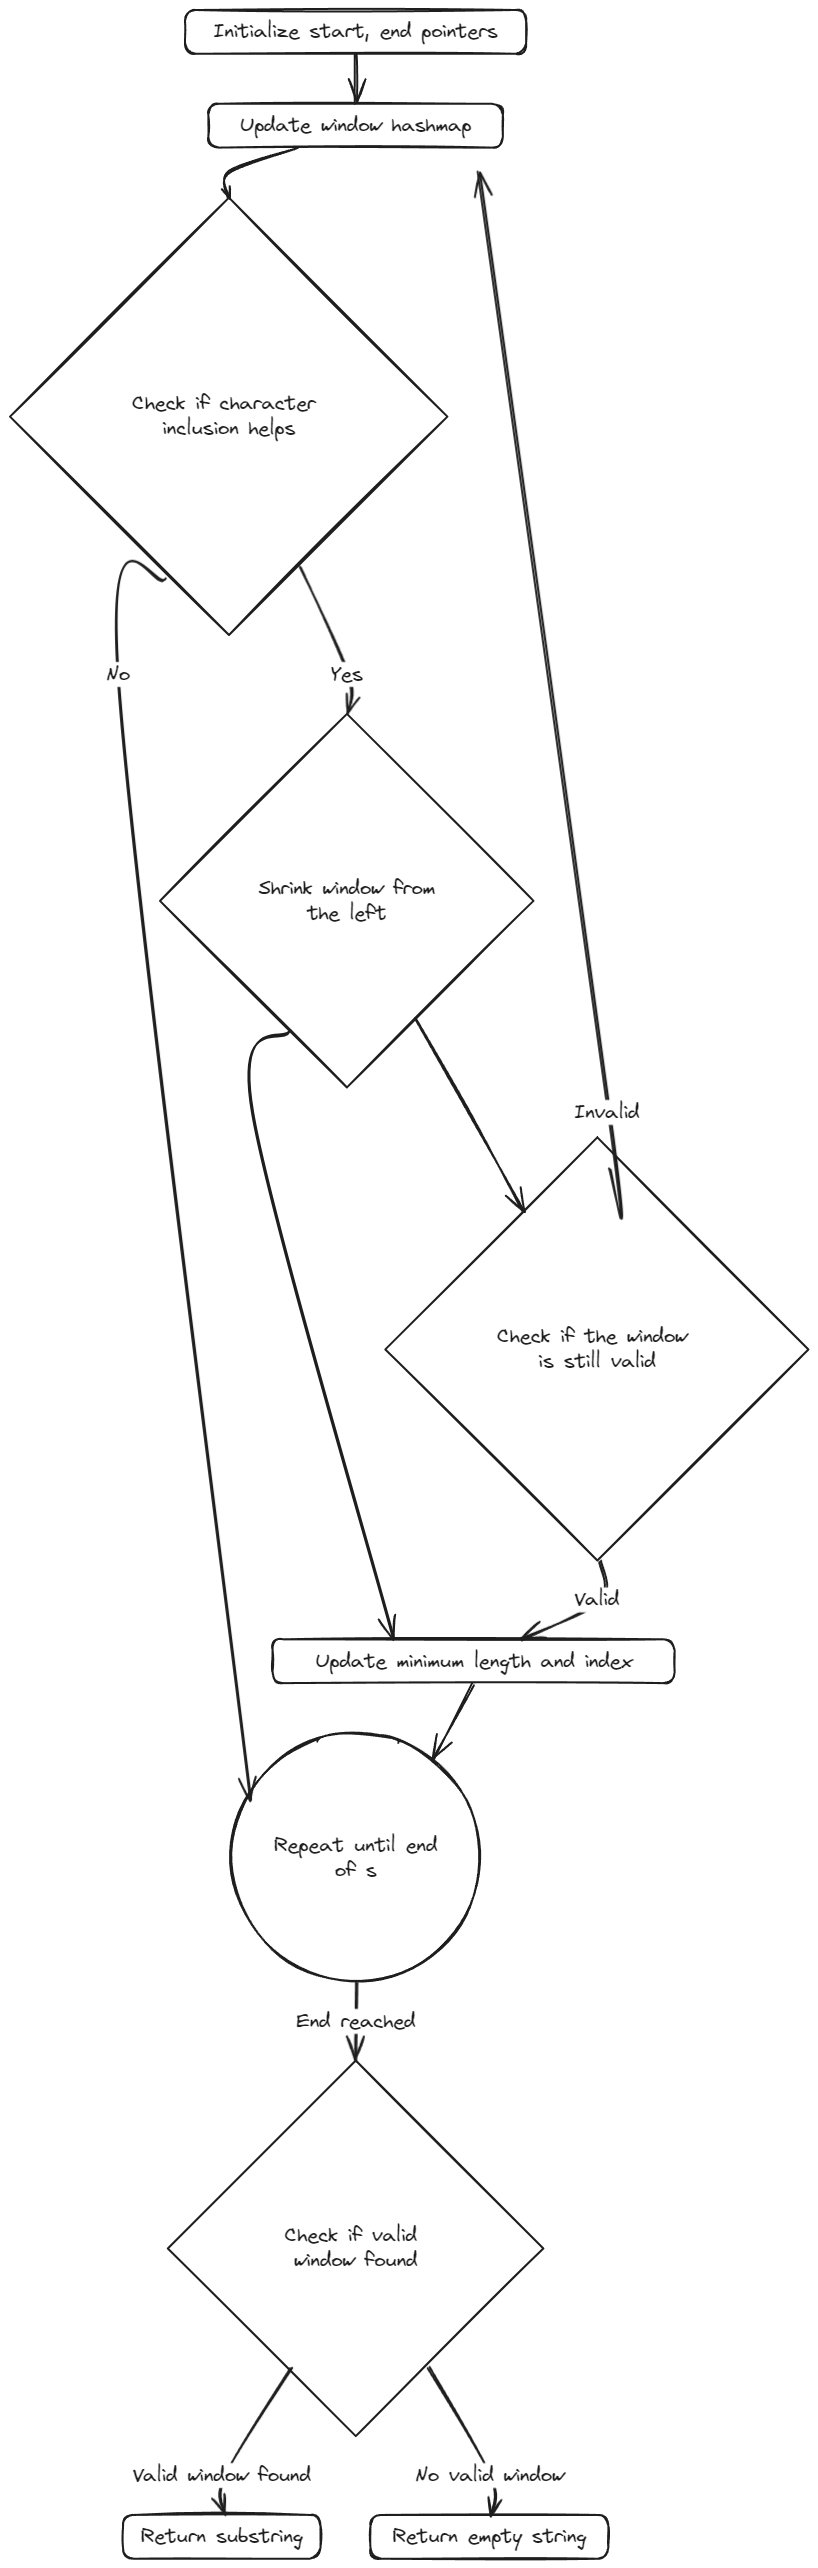

In [ ]:
class Solution(object):
    def minWindow(self, s, t):
        """
        :type s: str
        :type t: str
        :rtype: str
        """
        if not t or not s:
            return ""

        dict_t = Counter(t)
        required = len(dict_t)
        l, r = 0, 0
        formed = 0
        window_counts = {}
        ans = float("inf"), None, None

        while r < len(s):
            character = s[r]
            window_counts[character] = window_counts.get(character, 0) + 1

            if character in dict_t and window_counts[character] == dict_t[character]:
                formed += 1

            while l <= r and formed == required:
                character = s[l]

                if r - l + 1 < ans[0]:
                    ans = (r - l + 1, l, r)

                window_counts[character] -= 1
                if character in dict_t and window_counts[character] < dict_t[character]:
                    formed -= 1

                l += 1    

            r += 1

        return "" if ans[0] == float("inf") else s[ans[1]:ans[2] + 1]